In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in a CSV file
! wget https://www.statlearning.com/s/Advertising.csv
adv = pd.read_csv('Advertising.csv')

--2024-03-19 23:41:21--  https://www.statlearning.com/s/Advertising.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv [following]
--2024-03-19 23:41:21--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.45K  --.-KB/s  

In [3]:
degree = 18
# Better be larger that degree!
numberOfPoints = 100

In [4]:
# Get a subset of the points
adv = adv.iloc[:numberOfPoints, :]

In [5]:
# Make some better names for the variables of interest
xTV = adv['TV']
# We normalize the data so that we can handle higher degree polynomials.
xTV = (xTV - np.mean(xTV)) / np.sqrt(np.var(xTV))
y = adv['sales']
n = len(xTV)

In [7]:
# This function creates a n-by-4 matrix where every entry is 1.
# The 4 is important!  This is what makes this a *multiple* linear
# regression.  n-by-2 is single linear regression and n-by-k with k>2
# is multiple linear regression.
X = np.matrix(np.ones((n, degree+1)))
# Reshape xTV to ensure it's a column matrix
xTV = np.array(xTV).reshape(-1, 1)
# Fill in columns 2-4 with our predictors.
for i in range(1, degree+1):
    X[:, i] = np.power(xTV, i)

In [8]:
# %*% is the R dot product operator, t(X) is the transpose of the matrix X,
# and solve returns the inverse of its argument.
# So, this matrix equation is the R version of the one
# from the course notes.
B = np.linalg.solve(np.transpose(X) @ X, np.transpose(X) @ y)

In [9]:
# These are the predicted values of sales
yHat = B[0]
for i in range(1, degree+1):
    yHat += xTV*B[i]

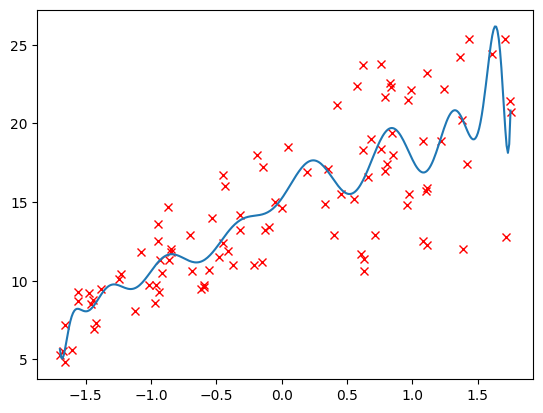

In [16]:
# Make a plot by choosing a fine data mesh to predict on.
plt.plot(xTV, y, marker='x', linestyle='None', color='red')
TVMeshX = np.arange(np.min(xTV), np.max(xTV), 0.01)
TVMeshY = B[0]
for i in range(1, degree+1):
    TVMeshY += B[i]*np.power(TVMeshX, i)

plt.plot(TVMeshX, TVMeshY)